# Backtesting optimization with Backtrader and Optunity
## Rodrigo Sucupira Andrade Lima
### https://github.com/rsucupira/
#### Particle Swarm Optimization in the opptunity python library https://github.com/claesenm/optunity
#### Python Backtesting library for trading strategies https://github.com/mementum/backtrader

<IPython.core.display.Javascript object>


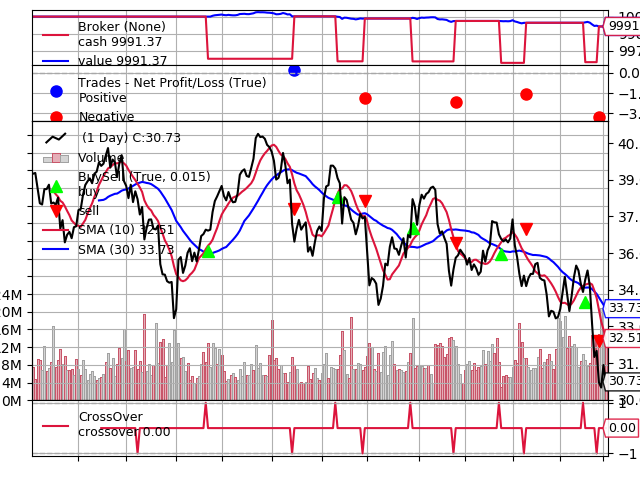

[[<Figure size 640x480 with 5 Axes>]]

In [1]:
import datetime
import pandas
import backtrader as bt
import backtrader.feeds as btfeed

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)


url = 'https://raw.githubusercontent.com/rsucupira/Evolutionary-Optimization/master/GM.csv'
dataframe = pandas.read_csv(url,header=0,parse_dates=True,index_col=0)
data = bt.feeds.PandasData(dataname=dataframe)

cerebro.adddata(data)
cerebro.run()
cerebro.plot()

In [2]:
import datetime
import pandas
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

import backtrader as bt

import optunity
import optunity.metrics

class SmaCross(bt.SignalStrategy):
    params = (
        ('sma1', 10),
        ('sma2', 30),
    )
    def __init__(self):
        SMA1 = bt.ind.SMA(period=int(self.params.sma1))
        SMA2 = bt.ind.SMA(period=int(self.params.sma2))
        crossover = bt.ind.CrossOver(SMA1, SMA2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

url = 'https://raw.githubusercontent.com/rsucupira/Evolutionary-Optimization/master/GM.csv'
dataframe = pandas.read_csv(url,header=0,parse_dates=True,index_col=0)
data0 = bt.feeds.PandasData(dataname=dataframe)

def runstrat(sma1,sma2):
    
    cerebro = bt.Cerebro()
    cerebro.addstrategy(SmaCross, sma1=sma1, sma2=sma2)

    cerebro.adddata(data0)
    cerebro.run()
    return cerebro.broker.getvalue()

opt = optunity.maximize(runstrat,  num_evals=100, sma1=[2, 55], sma2=[2, 55])

optimal_pars, details, _ = opt
print('Optimal Parameters:')
print('sma1 = %.2f' % optimal_pars['sma1'])
print('sma2 = %.2f' % optimal_pars['sma2'])

#cerebro = bt.Cerebro()
#cerebro.addstrategy(SmaCross, sma1=optimal_pars['sma1'], sma2=optimal_pars['sma2'])
#cerebro.adddata(data0)
#cerebro.run()
#cerebro.plot()

Optimal Parameters:
sma1 = 21.41
sma2 = 17.68


### Let´s plot the state-space of the objective function with matplotlib

Text(0.5, 0, 'Value')

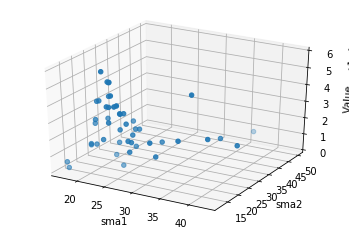

In [5]:
%matplotlib inline
from matplotlib import pylab as plt
from mpl_toolkits.mplot3d import Axes3D

df = optunity.call_log2dataframe(details.call_log)

cutoff = 10000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df[df.value > cutoff]['sma1'],
           ys=df[df.value > cutoff]['sma2'],
           zs=df[df.value > cutoff]['value'])
ax.set_xlabel('sma1')
ax.set_ylabel('sma2')
ax.set_zlabel('Value')

